In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load from Delta
tesla_sdf = spark.read.format("delta").load("/mnt/data/tesla_delta")

# Convert back to pandas if needed
tesla_cleaned_df = tesla_sdf.toPandas()
print(tesla_cleaned_df)

       _c0       Date       Open       High        Low      Close     Volume
0        0 2010-06-29   1.266667   1.666667   1.169333   1.592667  281494500
1        1 2010-06-30   1.719333   2.028000   1.553333   1.588667  257806500
2        2 2010-07-01   1.666667   1.728000   1.351333   1.464000  123282000
3        3 2010-07-02   1.533333   1.540000   1.247333   1.280000   77097000
4        4 2010-07-06   1.333333   1.333333   1.055333   1.074000  103003500
...    ...        ...        ...        ...        ...        ...        ...
3529  1762 2017-06-28  24.445333  24.782667  24.167999  24.749332   94537500
3530  1763 2017-06-29  24.707333  24.733334  23.606667  24.049999  123315000
3531  1764 2017-06-30  24.247334  24.451332  23.974667  24.107332   87727500
3532  1765 2017-07-03  24.682667  24.756666  23.433332  23.507999   94581000
3533  1766 2017-07-05  23.146667  23.149332  21.755333  21.806000  255700500

[3534 rows x 7 columns]


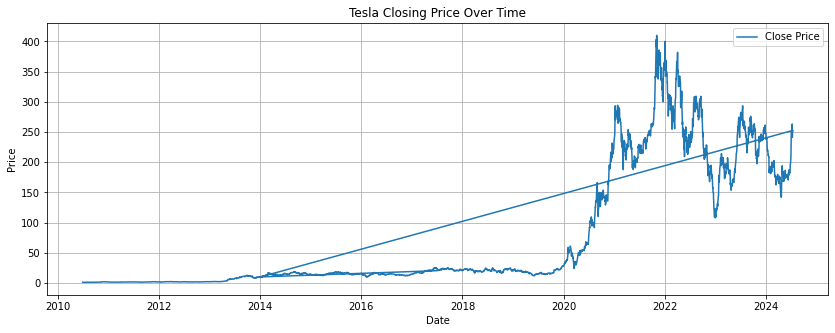

In [0]:
# Visualizes how Tesla's closing price evolved over time.

plt.figure(figsize=(14, 5))
plt.plot(tesla_cleaned_df['Date'], tesla_cleaned_df['Close'], label='Close Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


This line plot shows how Tesla's closing stock price has evolved from 2015 through 2024. For the first few years, the price remained relatively stable, fluctuating between $40 and $100. Around late 2019 to 2020, the price began to rise sharply, indicating a period of rapid growth likely influenced by product innovations, increased investor interest, and broader electric vehicle market optimism. The continued upward trend post-2020 reflects Tesla’s transition from a niche automaker to a major market player.

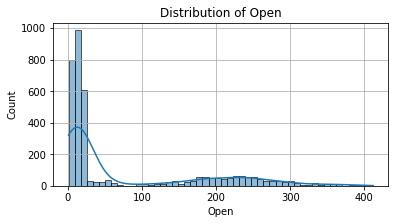

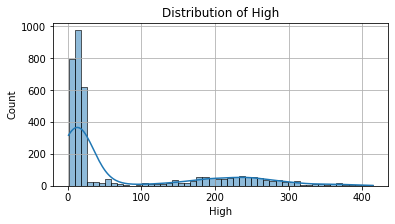

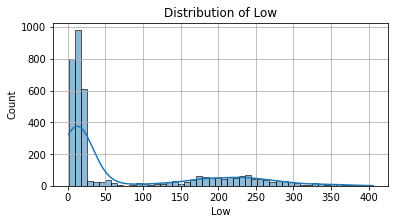

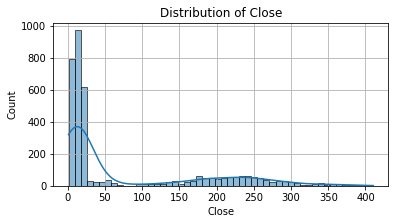

In [0]:
# Visualizes how each price variable is distributed.

cols = ['Open', 'High', 'Low', 'Close']
for col in cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(tesla_cleaned_df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()



These histograms visualize the distribution of Tesla's stock prices (Open, High, Low, Close) over the given period. All price-related features exhibit right-skewed distributions, meaning that lower price values were more common during the earlier years of the dataset. This skewness further confirms Tesla's substantial growth in recent years. The long tails to the right represent recent periods when the stock traded at significantly higher prices.

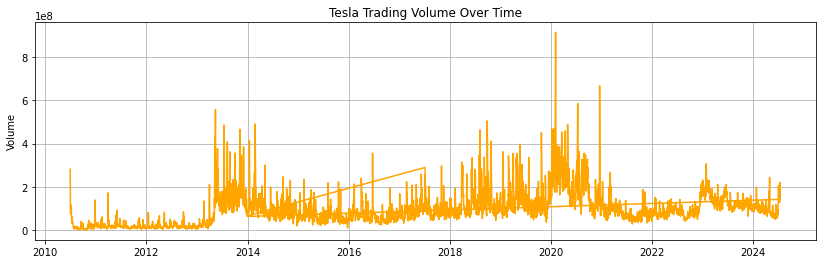

In [0]:
# Measures how actively Tesla stock was traded over the years.

plt.figure(figsize=(14, 4))
plt.plot(tesla_cleaned_df['Date'], tesla_cleaned_df['Volume'], color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


The trading volume plot shows how many Tesla shares were traded daily. Spikes in volume often correlate with key events such as earnings reports, stock splits, or significant announcements from Tesla or its CEO. There is a noticeable increase in trading activity post-2019, suggesting heightened market interest and volatility. Volume analysis helps identify periods of abnormal investor activity and market sentiment shifts.

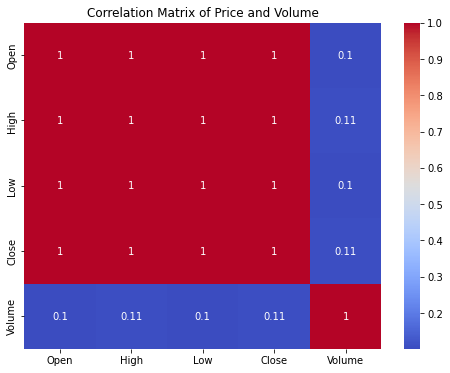

In [0]:
# Measures how strongly different columns are linearly related

plt.figure(figsize=(8, 6))
sns.heatmap(tesla_cleaned_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price and Volume')
plt.show()


The correlation heatmap reveals strong positive correlations between Open, High, Low, and Close prices — as expected in time-series stock data. Trading Volume shows weak or negligible correlation with price variables, implying that a high trading volume doesn't always coincide with price increases or decreases. This reinforces the need to use more advanced features or modeling to detect volume-price relationships.

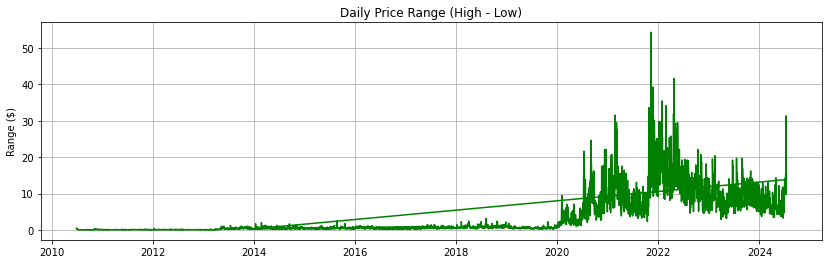

In [0]:
# Measures volatility in price movement on each trading day.

tesla_cleaned_df['Daily_Range'] = tesla_cleaned_df['High'] - tesla_cleaned_df['Low']

plt.figure(figsize=(14, 4))
plt.plot(tesla_cleaned_df['Date'], tesla_cleaned_df['Daily_Range'], color='green')
plt.title('Daily Price Range (High - Low)')
plt.ylabel('Range ($)')
plt.grid(True)
plt.show()


The daily range (High minus Low) is a proxy for intraday volatility. This plot highlights periods when Tesla stock was more volatile than usual. Larger ranges suggest days with significant intraday movement, often driven by market news or speculation. Notable spikes in range occurred during earnings weeks or following major announcements. Understanding these patterns helps in identifying high-risk, high-reward periods for traders.

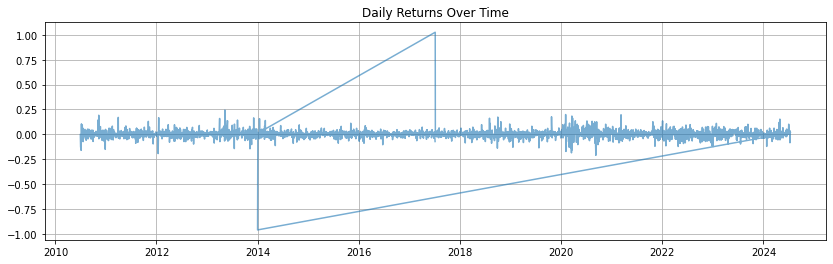

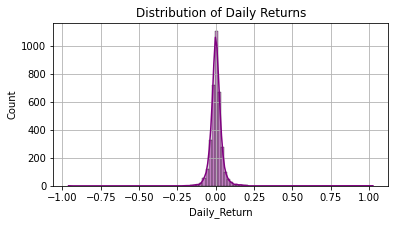

In [0]:


tesla_cleaned_df['Daily_Return'] = tesla_cleaned_df['Close'].pct_change()

plt.figure(figsize=(14, 4))
plt.plot(tesla_cleaned_df['Date'], tesla_cleaned_df['Daily_Return'], alpha=0.6)
plt.title('Daily Returns Over Time')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(tesla_cleaned_df['Daily_Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.grid(True)
plt.show()


The daily return line chart tracks Tesla's day-to-day percentage change in closing price. Most returns cluster around 0%, but the chart also displays several sharp upward or downward spikes. These outliers often correspond to market reactions to news or broader economic events. High volatility is apparent, especially post-2020, underscoring Tesla's nature as a high-beta (high-risk/high-reward) stock.

The histogram of daily returns shows that most daily changes are small and centered around 0%, forming a bell-shaped curve. However, the presence of fat tails — especially on the positive side — suggests that while most days see modest movement, there are a few days with extreme gains or losses. This return profile reflects the speculative and momentum-driven nature of Tesla’s stock in recent years.

In [0]:
# Convert pandas DataFrame to Spark DataFrame
tesla_cleaned_sp_df = spark.createDataFrame(tesla_cleaned_df)

# Save as Delta table (or use Parquet/CSV)
tesla_sdf.write.mode("overwrite").format("delta").save("/mnt/data/tesla_eda")